In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import glob
from matplotlib.animation import FuncAnimation
from matplotlib.patches import Circle

from liggghts_file_parsing import get_dt, create_bond_df, create_atom_df

%config InlineBackend.figure_format = 'retina'

In [2]:
def plot_relevant_quantities(df_atom, df_bond, dt, simulation_num, len = -1):
    fig, axes = plt.subplots(5,1, layout = 'constrained', sharex=True, figsize = (8,10))
    ax = axes.flatten()

    fig.suptitle(f'simulation: {simulation_num}')

    plt.sca(ax[0])
    id = 1
    plt.plot(df_atom.index.values * dt, df_atom[id]['atom_fmag'], 'o-', color = 'r', lw = 0.5, markersize = 1, label = f'id = {id}')
    id = 2
    plt.plot(df_atom.index.values * dt, df_atom[id]['atom_fmag'], 'o-', color = 'b', lw = 0.5, markersize = 1, label = f'id = {id}')
    plt.ylabel(r'$|F_a|$ [N]')
    plt.grid(True)
    plt.legend()

    plt.sca(ax[1])
    id = 1
    plt.plot(df_atom.index.values * dt, np.abs(df_atom[id]['x'].values - df_atom[id]['x'].values[0]), 'o-', color = 'r', lw = 0.5, markersize = 1, label = f'id = {id}')
    id = 2
    plt.plot(df_atom.index.values * dt, np.abs(df_atom[id]['x'].values - df_atom[id]['x'].values[0]), 'o-', color = 'b', lw = 0.5, markersize = 1, label = f'id = {id}')
    plt.ylabel(r'$\Delta x$ [m]')
    plt.grid(True)
    plt.legend()

    plt.sca(ax[2])
    id = 1
    plt.plot(df_atom.index.values * dt, np.abs(df_atom[id]['vx'].values), 'o-', color = 'r', lw = 0.5, markersize = 1, label = f'id = {id}')
    id = 2
    plt.plot(df_atom.index.values * dt, np.abs(df_atom[id]['vx'].values) , 'o-', color = 'b', lw = 0.5, markersize = 1, label = f'id = {id}')
    plt.ylabel(r'$|v_x|$ [m/s]')
    plt.grid(True)
    plt.legend()

    plt.sca(ax[3])
    id = 1
    plt.plot(df_atom.index.values * dt, df_atom[id]['fx'], 'o-', color = 'r', lw = 0.5, markersize = 1, label = f'id = {id}')
    id = 2
    plt.plot(df_atom.index.values * dt, df_atom[id]['fx'], 'o-', color = 'b', lw = 0.5, markersize = 1, label = f'id = {id}')
    plt.ylabel(r'$F_x$ [N]')
    plt.grid(True)
    plt.legend()

    plt.sca(ax[4])
    plt.plot(df_bond.index.values * dt, np.abs(df_bond['b_fmag'].values), 'o-', color = 'k', lw = 0.5, markersize = 1)
    plt.ylabel(r'$|F_b|$ [N]')
    plt.xlabel('time [s]')
    plt.grid(True)


    plt.close()

    return fig

In [3]:
# Path to the main directory containing all subdirectories
main_directory = r"\\wsl$\Ubuntu-18.04\home\arlenlex\LIGGGHTS_SEAICE\lexi_tests\bond_damping_and_contact_interaction"

# Loop over each subdirectory in the main directory
for dir_name in os.listdir(main_directory):
    if dir_name.startswith('post_bond_damp_val'):  # Check if the directory name follows the pattern
        directory_path = os.path.join(main_directory, dir_name)
        
        # Extract the value from the directory name
        value = dir_name.split('_')[-1]
        
        # Construct log file path based on the extracted value
        log_file_path = os.path.join(directory_path, f'log_bond_damp_val_{value}.liggghts')
        
        
        # Execute your functions
        dt = get_dt(log_file_path)
        df_bond = create_bond_df(directory_path)
        df_atom = create_atom_df(directory_path)
        
        # Plot
        plot_title = f"{dir_name}"
        fig = plot_relevant_quantities(df_atom, df_bond, dt, plot_title)

        # Save plot
        fig.savefig(os.path.join(directory_path, f"plot_{value}.png"))  # Save the figure as PNG
        plt.close(fig)  # Close the figure to free up memory

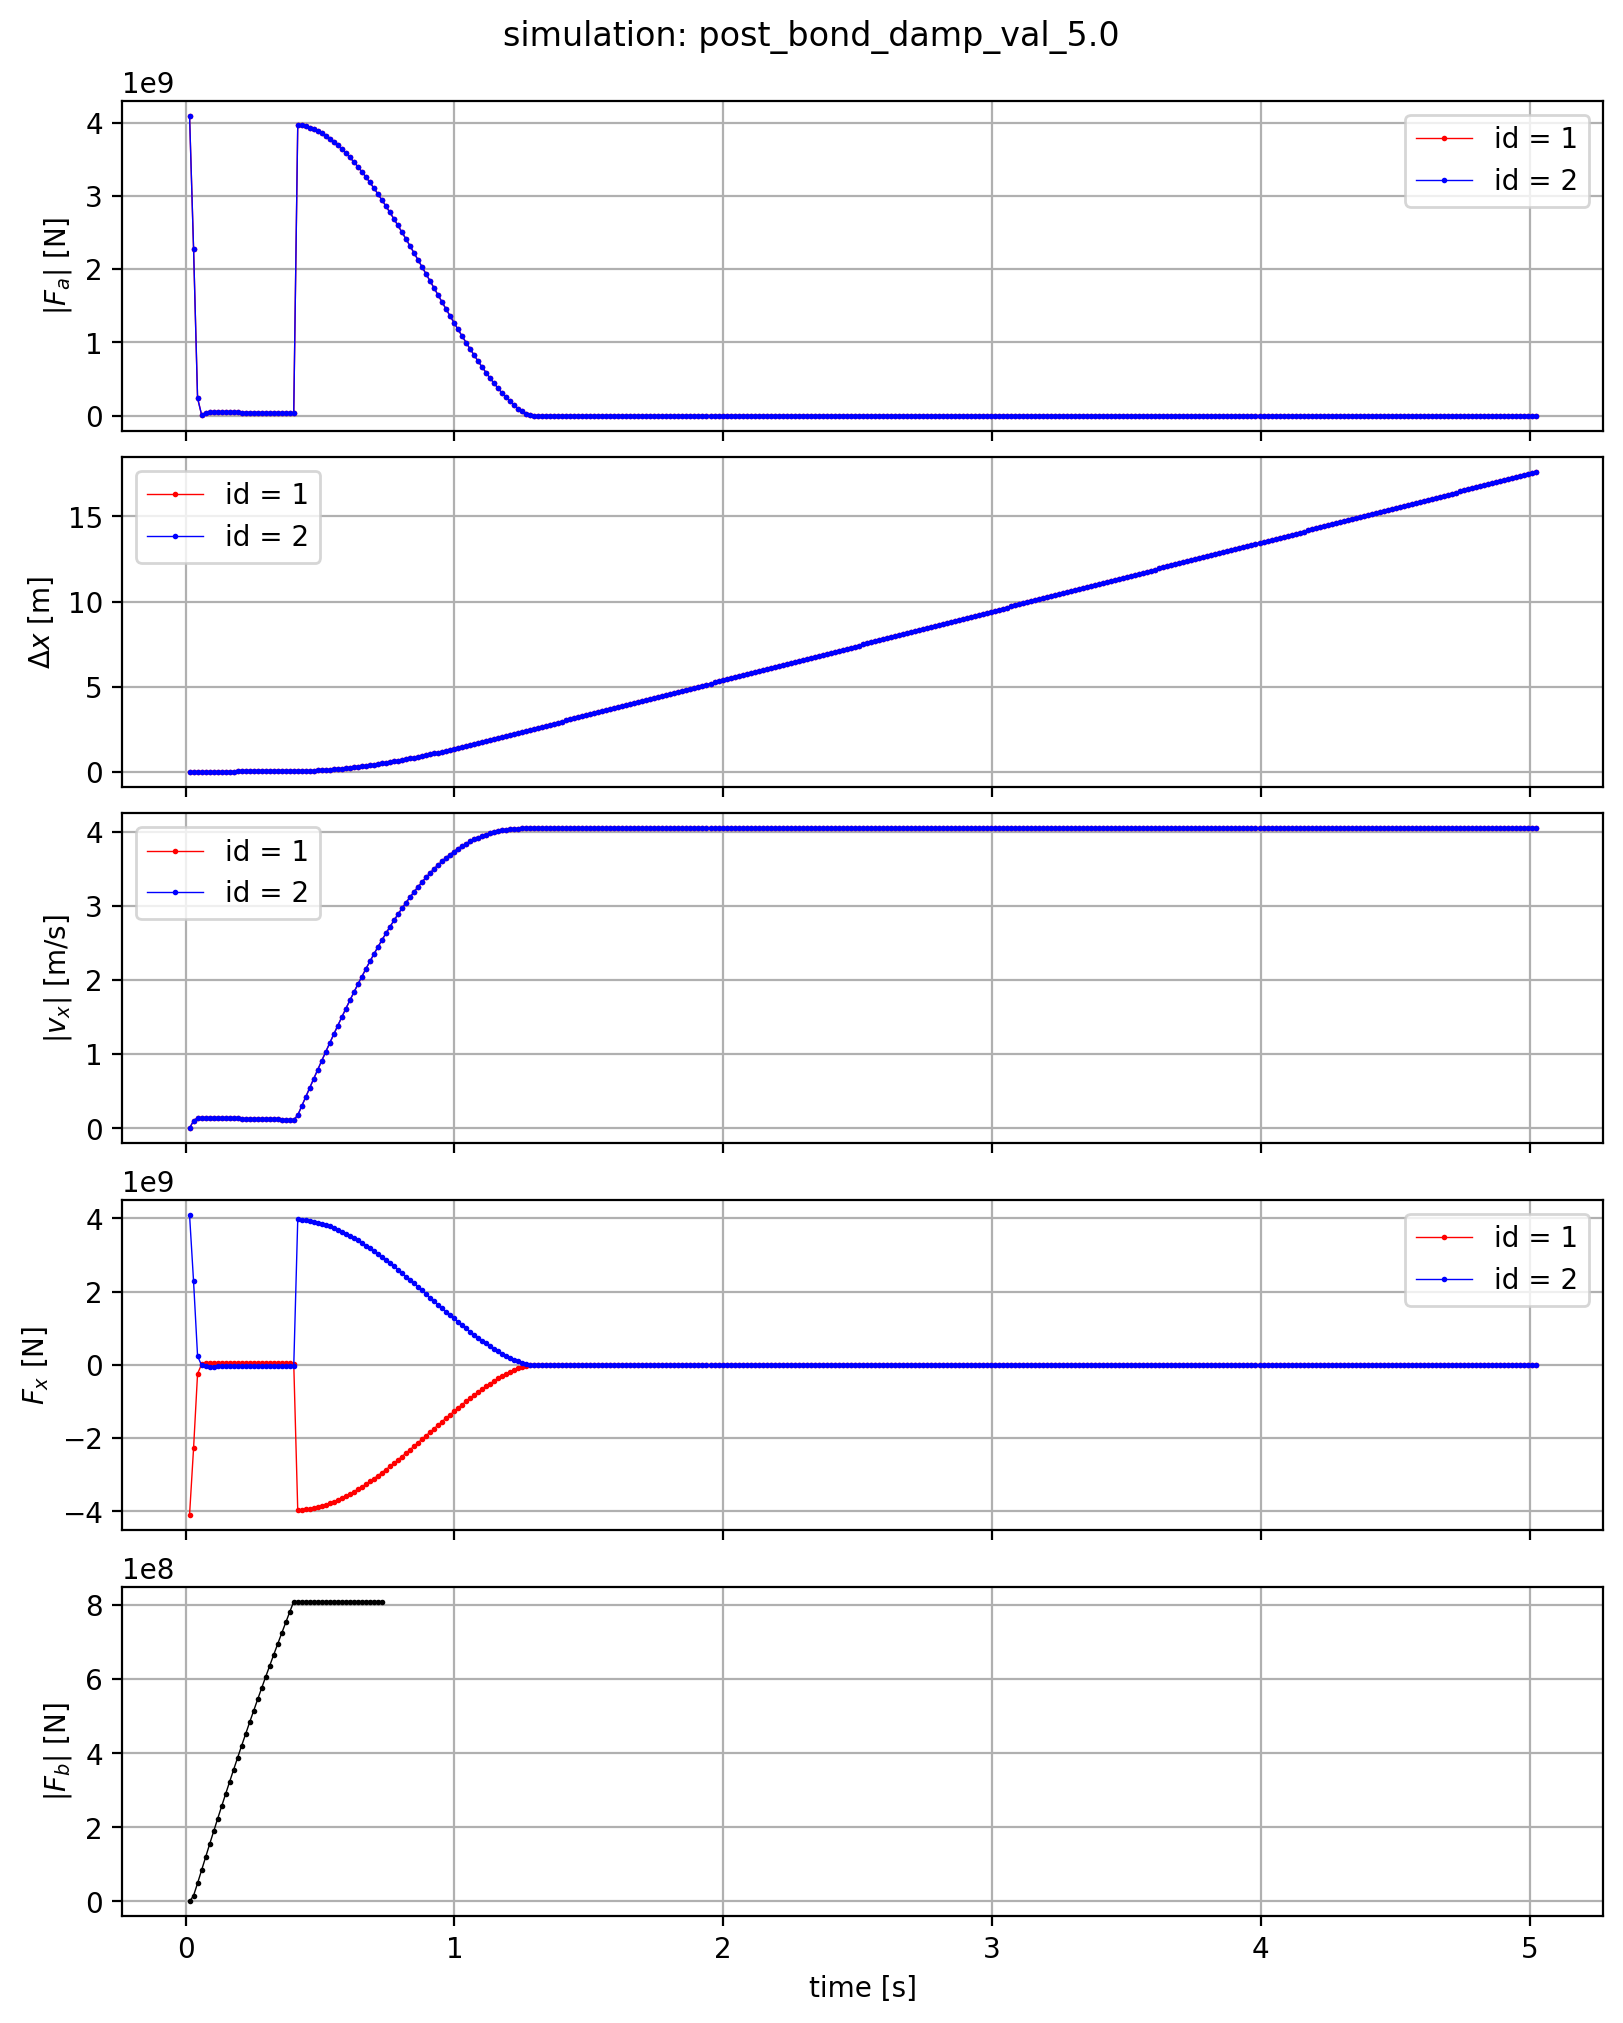

In [4]:
fig